### Laboratorium 5 - zadania - transformacja Hougha

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Zadanie 1

Zbadaj wpływ parametrów transformacji Hougha na jakość detekcji prostych na przykładzie obrazu `norway`. Wykorzystaj ulubiony detektor krawędzi i zaprezentuj jego wynik przed użyciem transformacji Hougha. Zapoznaj się z dokumentacją funkcji [`cv2.HoughLines`](https://docs.opencv.org/4.5.3/dd/d1a/group__imgproc__feature.html#ga46b4e588934f6c8dfd509cc6e0e4545a), zwłaszcza parametrami sterującymi rozdzielczością `rho`, `theta` oraz progiem (`threshold`). Błędnie dobrany próg może szczególnie negatywnie wpłynąć na wyniki.

Zacznij od znalezienia odpowiednich parametrów detektora krawędzi - jeśli na tym etapie wyniki będą słabe, to dalej będzie tylko gorzej (_garbage-in, garbage-out_) - ale nie skupiaj się na badaniu ich wpływu na wyniki.

Zadanie _nie_ polega na zrobieniu grid searcha parametrów transformacji Hougha, tylko na zrozumieniu zachowania parametrów `rho` i `theta`, oraz wpływu progu.

Ostateczny rezultat zaprezentuj w postaci odcinków naniesionych na kopię obrazu wejściowego (patrz komórka `[3]`).

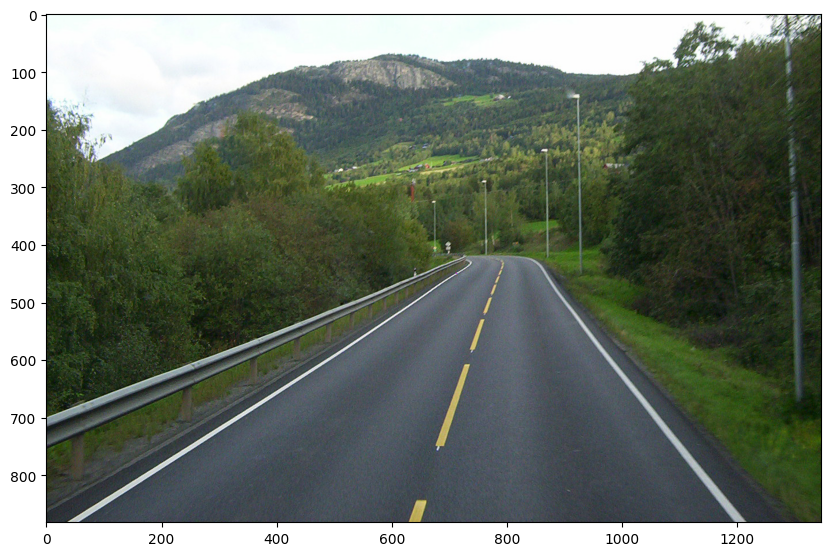

In [48]:
norway = cv2.imread('norway.jpg')
plt.subplots(1, 1, figsize=(10,10))[1].imshow(norway[..., ::-1]);

In [49]:
def rhotheta2xy(line):
    # konwersja parametrów prostej w układzie rho-theta do odcinka w układzie kartezjańskim
    # wynik można użyć jako argumenty funkcji cv2.line
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 5000*(-b))
    y1 = int(y0 + 5000*(a))
    x2 = int(x0 - 5000*(-b))
    y2 = int(y0 - 5000*(a))
    return x1, y1, x2, y2

Rozwiązanie:

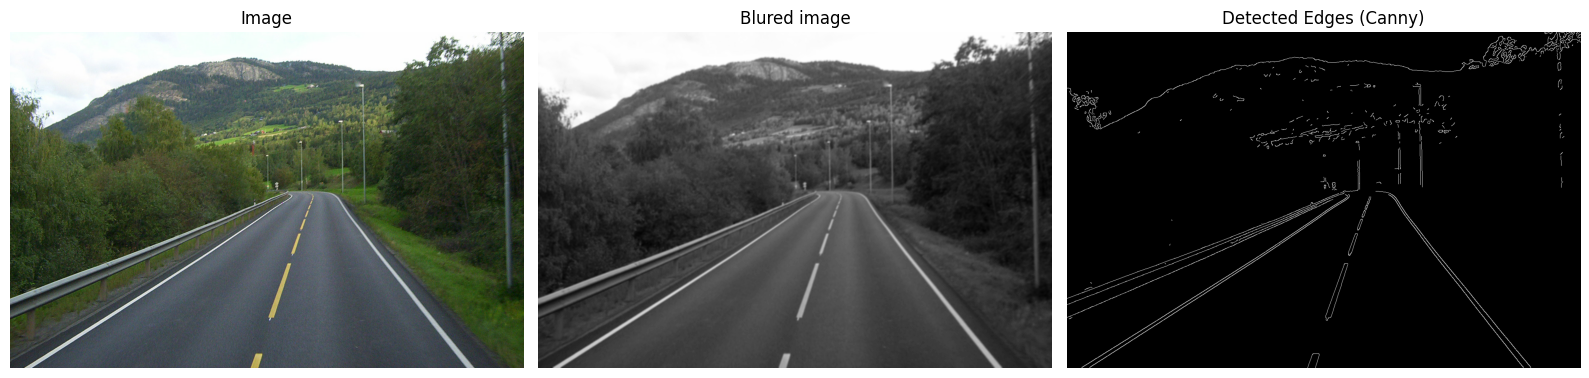

In [50]:
gray = cv2.cvtColor(norway, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (9, 9), 0)
edges = cv2.Canny(blur, threshold1=80, threshold2=100)

plt.figure(figsize=(16, 8))

plt.subplot(1, 3, 1)
plt.imshow(norway[..., ::-1])
plt.title("Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(blur, cmap="gray")
plt.title("Blured image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(edges, cmap="gray")
plt.title("Detected Edges (Canny)")
plt.axis("off")

plt.tight_layout()
plt.show()

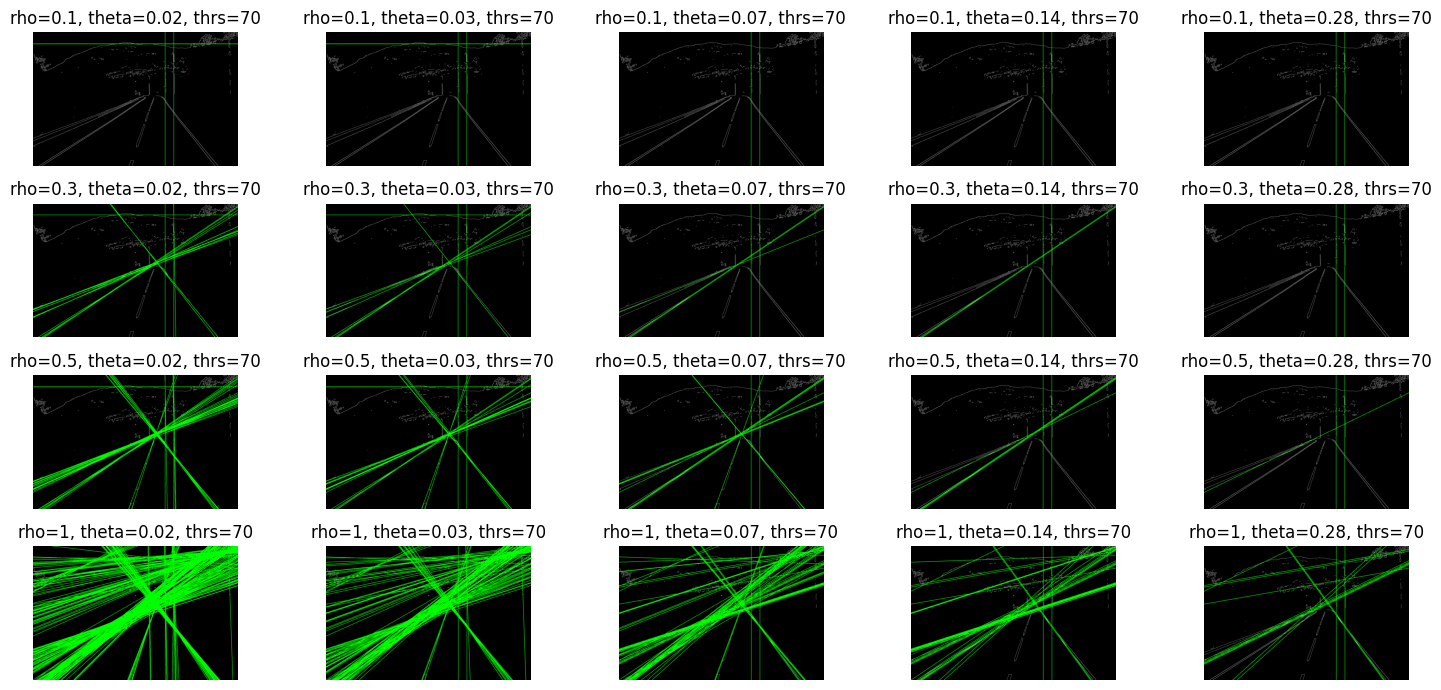

In [51]:
rho_values = [0.1, 0.3, 0.5, 1]
radians = np.pi / 180
theta_values = [1 * radians, 2 * radians, 4 * radians, 8 * radians, 16 * radians]
threshold = 70

fig, axes = plt.subplots(len(rho_values), len(theta_values), figsize=(15, 7))

for i, rho in enumerate(rho_values):
    for j, theta in enumerate(theta_values):
        norway_copy = edges.copy()
        norway_copy = cv2.cvtColor(norway_copy, cv2.COLOR_GRAY2BGR)
        lines = cv2.HoughLines(edges, rho=rho, theta=theta, threshold=threshold)

        if lines is not None:
            for line in lines:
                x1, y1, x2, y2 = rhotheta2xy(line)
                
                cv2.line(norway_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)

        ax = axes[i, j]
        ax.imshow(norway_copy)
        ax.set_title(f'rho={rho}, theta={theta:.2f}, thrs={threshold}')
        ax.axis('off')

plt.tight_layout()
plt.show()

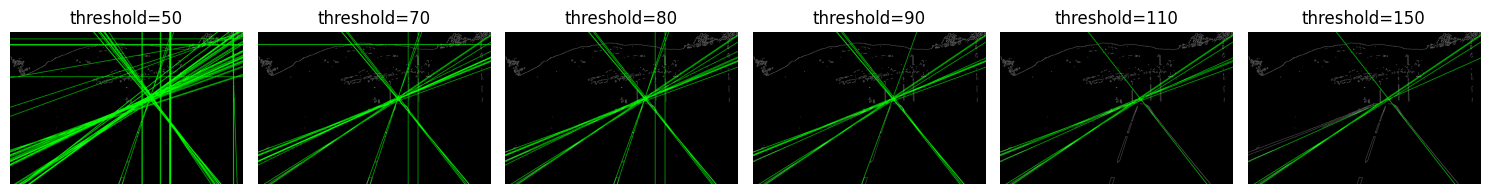

In [52]:
rho = 0.5
theta = 2 * radians
threshold_values = [50, 70, 80, 90, 110, 150]

fig, axes = plt.subplots(1, len(threshold_values), figsize=(15, 7))

for i, threshold in enumerate(threshold_values):
    norway_copy = edges.copy()
    norway_copy = cv2.cvtColor(norway_copy, cv2.COLOR_GRAY2BGR)

    lines = cv2.HoughLines(edges, rho=rho, theta=theta, threshold=threshold)

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = rhotheta2xy(line)
            cv2.line(norway_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)

    ax = axes[i]
    ax.imshow(norway_copy)
    ax.set_title(f'threshold={threshold}')
    ax.axis('off')

plt.tight_layout()
plt.show()

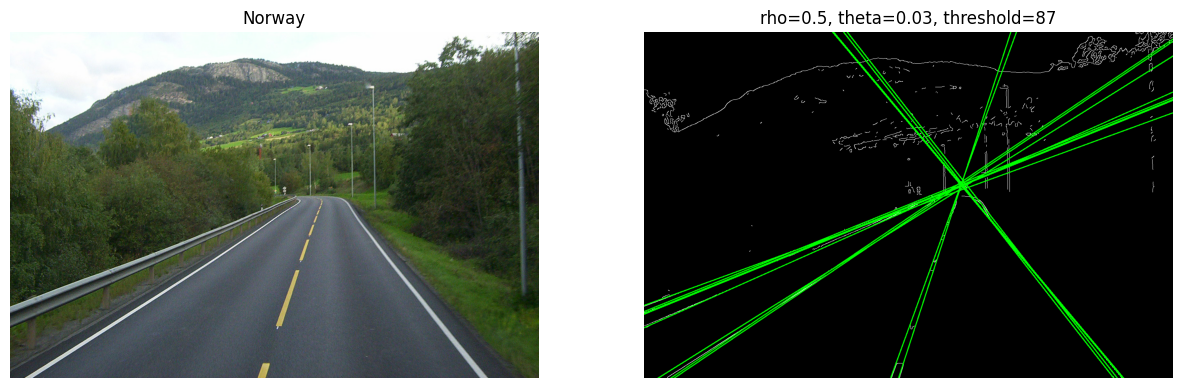

In [53]:
rho = 0.5
theta = 2 * radians
threshold = 87

norway_copy = edges.copy()
norway_copy = cv2.cvtColor(norway_copy, cv2.COLOR_GRAY2BGR)

lines = cv2.HoughLines(edges, rho=rho, theta=theta, threshold=threshold)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = rhotheta2xy(line)
        cv2.line(norway_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(norway[..., ::-1])
plt.title('Norway')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(norway_copy)
plt.title(f'rho={rho}, theta={theta:.2f}, threshold={threshold}')
plt.axis('off')

plt.show()

#### Zadanie 2

Dany jest obraz `pillbox`. Wykorzystaj transformację Hougha dla prostych, aby wykryć krawędzie między komórkami organizera.

Dla odmiany, w tym zadaniu nie jest istotne badanie parametrów ale wyłącznie końcowy wynik.

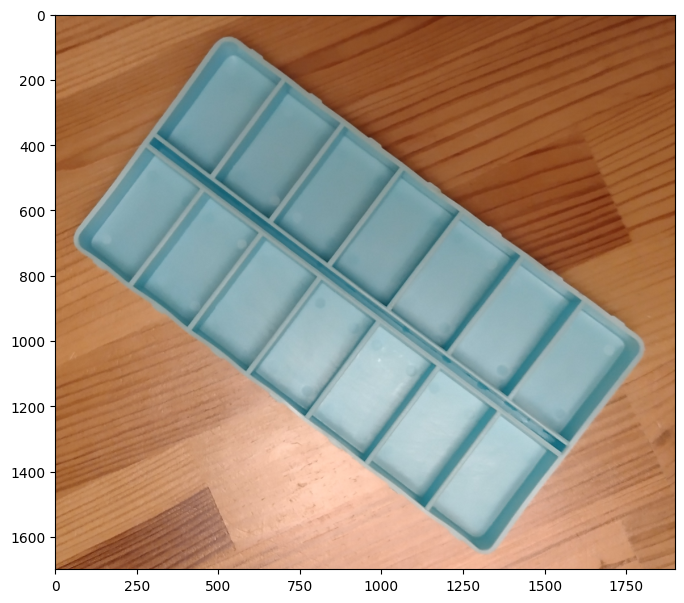

In [54]:
pillbox = cv2.imread('pillbox.png')
plt.subplots(1, 1, figsize=(8,8))[1].imshow(pillbox[..., ::-1]);

Rozwiązanie:

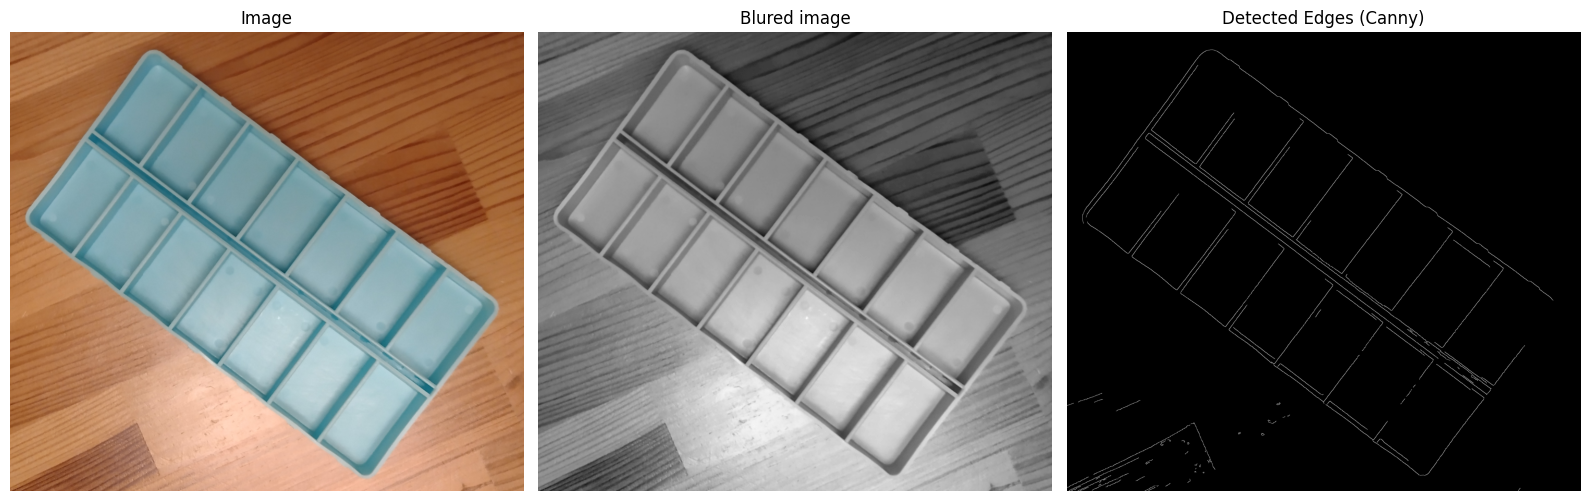

In [55]:
gray = cv2.cvtColor(pillbox, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
canny_pillbox = cv2.Canny(blur, threshold1=60, threshold2=120)

plt.figure(figsize=(16, 8))

plt.subplot(1, 3, 1)
plt.imshow(pillbox[..., ::-1])
plt.title("Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(blur, cmap="gray")
plt.title("Blured image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(canny_pillbox, cmap="gray")
plt.title("Detected Edges (Canny)")
plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
def rhotheta2xy(rho, theta):
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 5000*(-b))
        y1 = int(y0 + 5000*(a))
        x2 = int(x0 - 5000*(-b))
        y2 = int(y0 - 5000*(a))
        return x1, y1, x2, y2

def split_cells(img, canny_img, params, filter_params):
    img_copy = img.copy()
    black_background = np.full(img.shape[:2], 255, dtype=np.uint8)
    filtered_lines = []

    lines = cv2.HoughLines(
        image = canny_img,
        rho = params[0],              
        theta = params[1],       
        threshold = params[2]            
    )

    # Filtrowanie linii, aby wyeliminować duplikaty lub blisko położone
    if lines is not None:
        for rho, theta in lines[:, 0]:
            add_line = True
            for frho, ftheta in filtered_lines:
                # Sprawdzenie, czy linia jest podobna do już dodanej (minimalna różnica między rho i theta)
                if abs(rho - frho) < filter_params[0] and abs(theta - ftheta) < np.deg2rad(filter_params[1]):
                    add_line = False
                    break
            if add_line:
                filtered_lines.append((rho, theta))

    for rho, theta in filtered_lines:
        x1, y1, x2, y2 = rhotheta2xy(rho, theta)
        pt1 = (x1, y1)
        pt2 = (x2, y2)
        cv2.line(img_copy, pt1, pt2, (255, 0, 0), 2, cv2.LINE_AA)
        cv2.line(black_background, pt1, pt2, 0, 2, cv2.LINE_AA)

    return img_copy, black_background

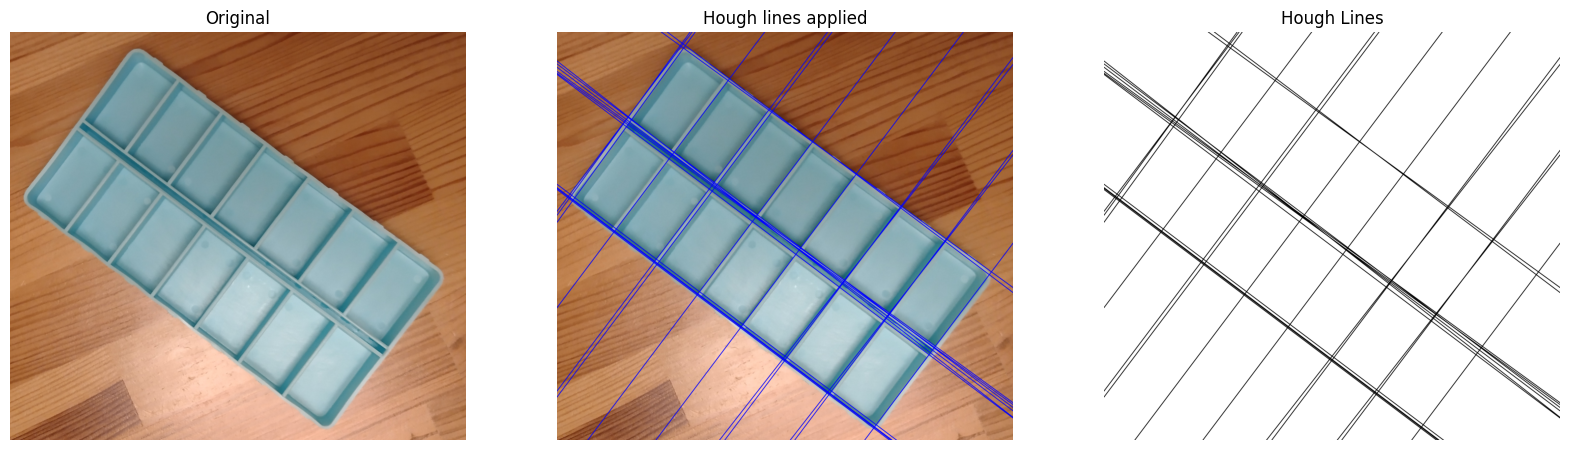

In [64]:
params = [1.1, np.pi / 180, 220] # rho, theta, threshold
filter_params = [1, 1] # diffrance for rhos and thetas
hough_pillbox, hough_lines = split_cells(pillbox, canny_pillbox, params, filter_params)

fig, axs = plt.subplots(1, 3, figsize=(20, 12))
axs[0].imshow(pillbox[..., ::-1])
axs[0].set_title('Original')
axs[0].axis('off')

axs[1].imshow(hough_pillbox[..., ::-1])
axs[1].set_title('Hough lines applied')
axs[1].axis('off')

axs[2].imshow(hough_lines, cmap = 'gray')
axs[2].set_title('Hough Lines')
axs[2].axis('off')

plt.show()

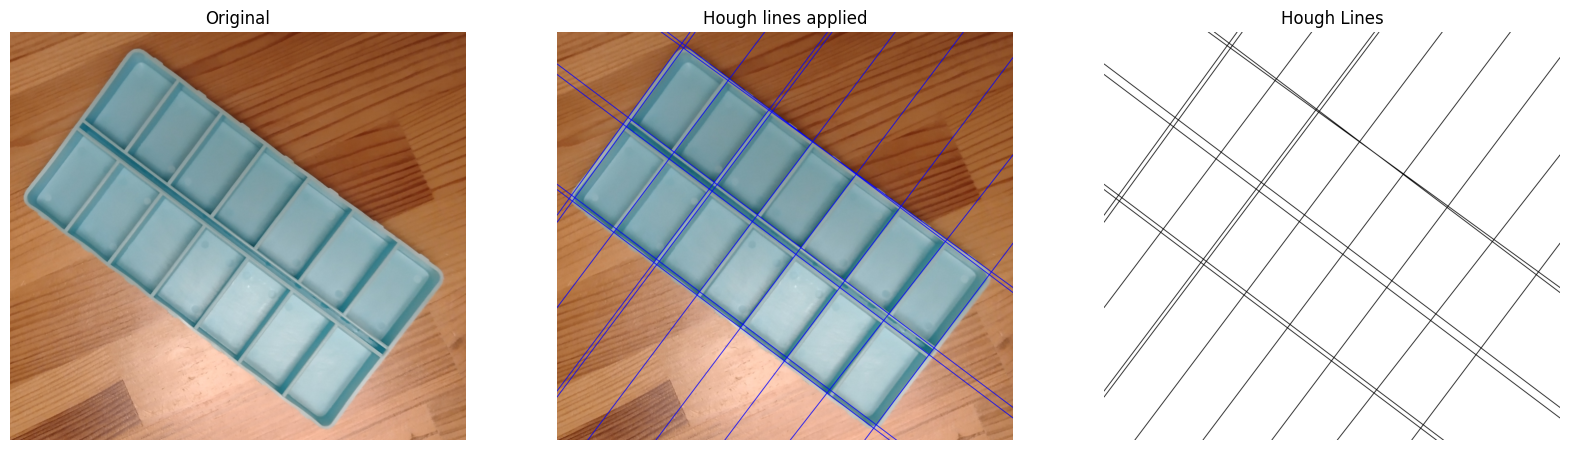

In [63]:
params = [1.1, np.pi / 180, 220] # rho, theta, threshold
filter_params = [15, 5] # diffrance for rhos and thetas
hough_pillbox, hough_lines = split_cells(pillbox, canny_pillbox, params, filter_params)

fig, axs = plt.subplots(1, 3, figsize=(20, 12))
axs[0].imshow(pillbox[..., ::-1])
axs[0].set_title('Original')
axs[0].axis('off')

axs[1].imshow(hough_pillbox[..., ::-1])
axs[1].set_title('Hough lines applied')
axs[1].axis('off')

axs[2].imshow(hough_lines, cmap = 'gray')
axs[2].set_title('Hough Lines')
axs[2].axis('off')

plt.show()